MLR

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import datetime
from sklearn import metrics
import seaborn as sns
import pmdarima as pm
sns.set()

In [36]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [37]:
df=pd.read_csv("../input/amazon-stock-price-all-time/Amazon.csv")

In [38]:
df=df.drop('Date',axis=1)
df=df.drop('Adj Close',axis=1)
df.head()

,Open,High,Low,Close,Volume
0,2.437500,2.500000,1.927083,1.958333,72156000
1,1.968750,1.979167,1.708333,1.729167,14700000
2,1.760417,1.770833,1.625000,1.708333,6106800
3,1.729167,1.750000,1.635417,1.635417,5467200
4,1.635417,1.645833,1.375000,1.427083,18853200


In [39]:
data_X = df.loc[:,df.columns !=  'Close' ]
data_Y = df['Close']
train_X, test_X, train_y,test_y = train_test_split(data_X,data_Y,test_size=0.2)

In [40]:
regressor = LinearRegression()
regressor.fit(train_X,train_y)

LinearRegression()

In [41]:
#Make Predictions and Evaluate the results
predict_y = regressor.predict(test_X)
print('Prediction Score : ' , regressor.score(test_X,test_y))
error = mean_squared_error(test_y,predict_y)
print('Mean Squared Error : ',error)
print('Root Mean Squared Error : ', np.sqrt(error))

Prediction Score :  0.999923769834731
Mean Squared Error :  53.94503333354039
Root Mean Squared Error :  7.344728268189395


In [42]:
final=pd.DataFrame(test_y.tolist(),columns=['Test'])
final['Predict']=predict_y
final

,Test,Predict
0,92.379997,93.841537
1,369.510010,371.329374
2,4.593750,4.603826
3,364.470001,362.958986
4,3409.000000,3403.906113
...,...,...
1226,270.190002,270.165754
1227,269.850006,270.148454
1228,306.570007,305.602455
1229,953.289978,951.094367


In [164]:
final=pd.DataFrame(test_y.tolist(),columns=['Test'])
final['Predict']=predict_y
final

,Test,Predict
0,92.379997,93.841537
1,369.510010,371.329374
2,4.593750,4.603826
3,364.470001,362.958986
4,3409.000000,3403.906113
...,...,...
1226,270.190002,270.165754
1227,269.850006,270.148454
1228,306.570007,305.602455
1229,953.289978,951.094367


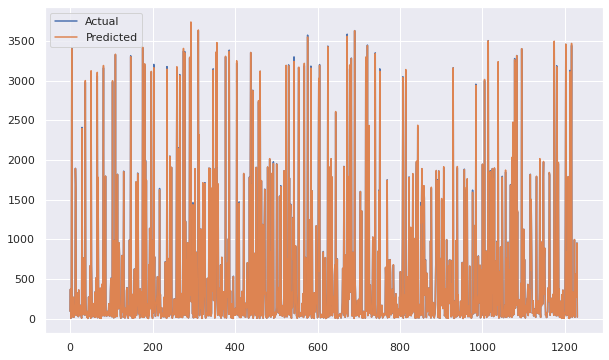

In [163]:
plt.plot(final['Test'],label='Actual')
plt.plot(final['Predict'],label='Predicted')
plt.legend()

ARIMAX

In [44]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [45]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
stock_data = pd.read_csv('../input/amazon-stock-price-all-time/Amazon.csv',sep=',', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
...,...,...,...,...,...,...
2021-10-21,3414.250000,3440.280029,3403.000000,3435.010010,3435.010010,1881400
2021-10-22,3421.000000,3429.840088,3331.300049,3335.550049,3335.550049,3133800
2021-10-25,3335.000000,3347.800049,3297.699951,3320.370117,3320.370117,2226000


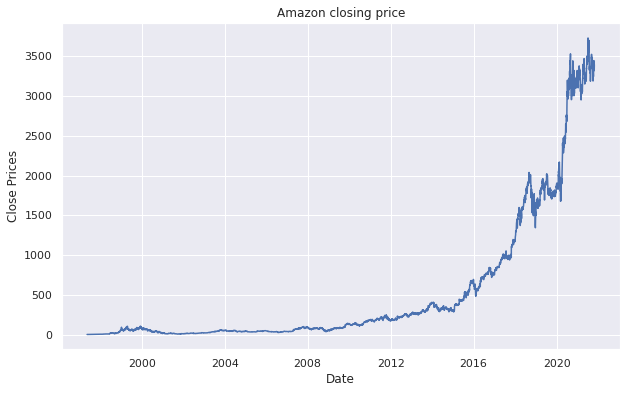

In [46]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(stock_data['Close'])
plt.title('Amazon closing price')
plt.show()

<AxesSubplot:ylabel='Density'>

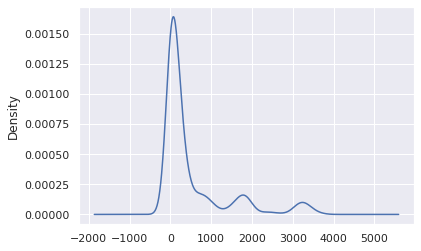

In [47]:
#Distribution of the dataset
df_close = stock_data['Close']
df_close.plot(kind='kde')

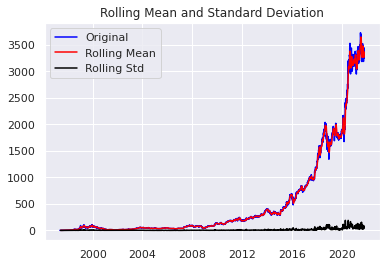

Results of dickey fuller test
Test Statistics                   3.912500
p-value                           1.000000
No. of lags used                 34.000000
Number of observations used    6120.000000
critical value (1%)              -3.431419
critical value (5%)              -2.862012
critical value (10%)             -2.567021
dtype: float64


In [48]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)

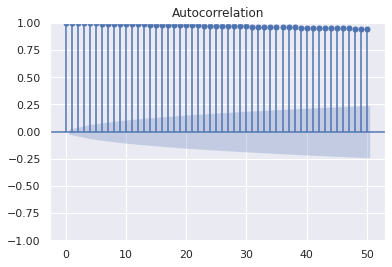

In [49]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
sm.graphics.tsa.plot_acf(df_close, lags=50)
plt.show()

<Figure size 432x288 with 0 Axes>

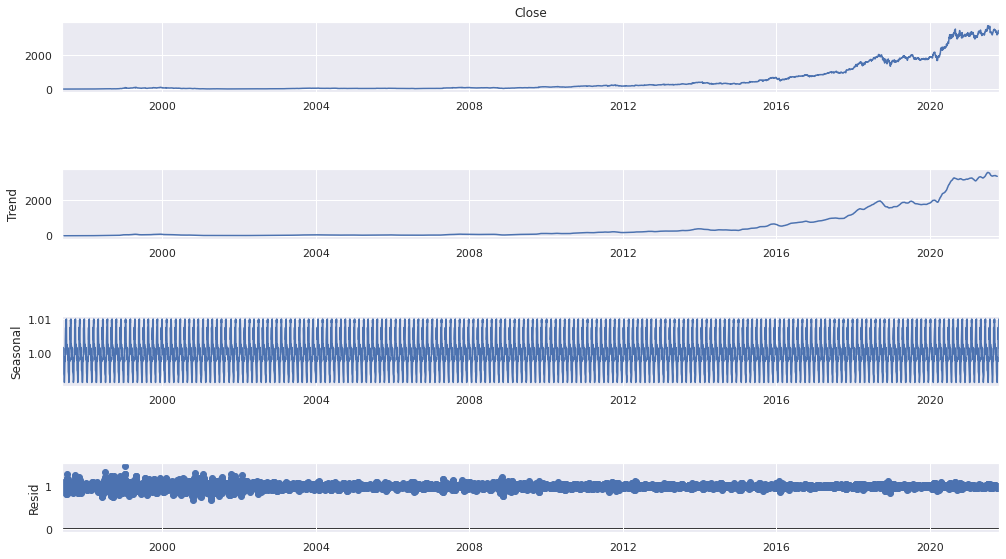

In [50]:
result = seasonal_decompose(df_close, model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

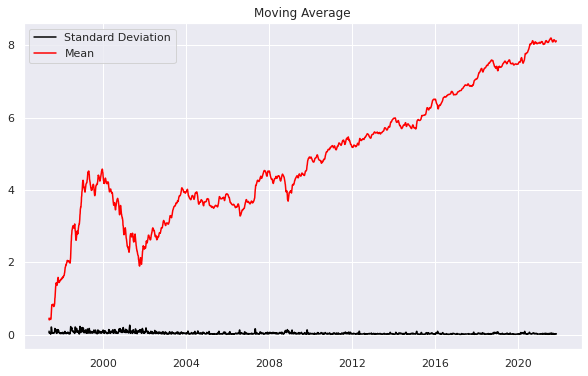

In [51]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

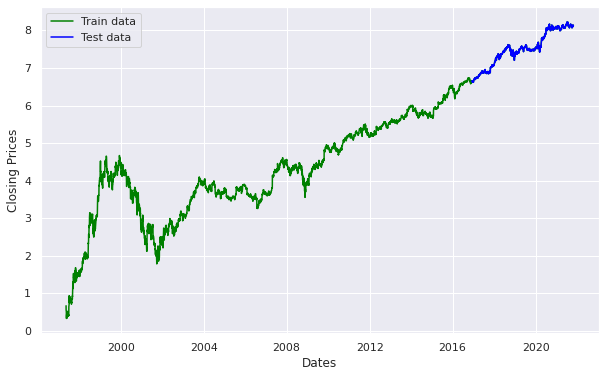

In [52]:
train_data, test_data = df_log[0:int(len(df_log)*0.8)], df_log[int(len(df_log)*0.8):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-17934.294, Time=0.33 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-17932.635, Time=0.64 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-17932.658, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-17931.572, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-17932.501, Time=0.70 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 2.147 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4924
Model:               SARIMAX(0, 1, 0)   Log Likelihood                8969.147
Date:                Wed, 16 Nov 2022   AIC                         -17934.294
Time:                        08:21:57   BIC                         -17921.290
Sample:                             0   HQIC                        -17929.733
                               - 4924                             

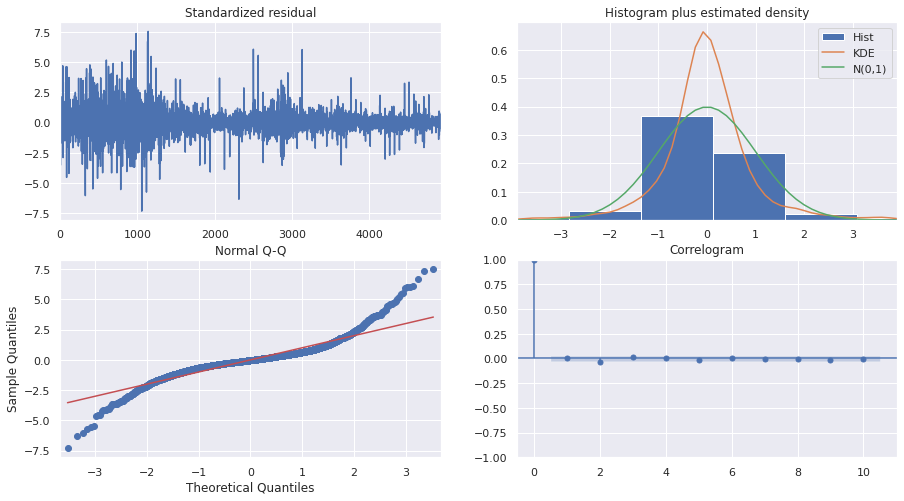

In [53]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       
                      max_p=3, max_q=3, 
                      m=1,              
                      d=None,           
                      seasonal=False,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True,exogenous=df['Volume'][:int(len(df_close)*0.8)])
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [54]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_data,exog=stock_data['Volume'][:int(len(df_close)*0.8)], order=(0, 1, 0))
fitted1 = model.fit()  
print(fitted1.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.91543D+00    |proj g|=  2.40046D+07


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     21      1     0     0   2.400D+07   1.915D+00
  F =   1.9154261886870367     

ABNORMAL_TERMINATION_IN_LNSRCH                              
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4924
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -9431.559
Date:                Wed, 16 Nov 2022   AIC                          18867.117
Time:                        08:21:58   BIC                          18880.120
Sample:                     


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


In [55]:
train_data=train_data.to_frame()
train_data['Close']=pd.to_numeric(train_data['Close'])
train_data['Predictions'] = list(fitted1.predict(0, len(train_data)-1))

,Close,Predictions
Date,,
1997-05-15,0.672094,0.078265
1997-05-16,0.547640,0.609773
1997-05-19,0.535518,0.538319
1997-05-20,0.491898,0.534824
1997-05-21,0.355633,0.506417
...,...,...
2016-11-30,6.620833,6.638097
2016-12-01,6.611571,6.620876
2016-12-02,6.607110,6.610372


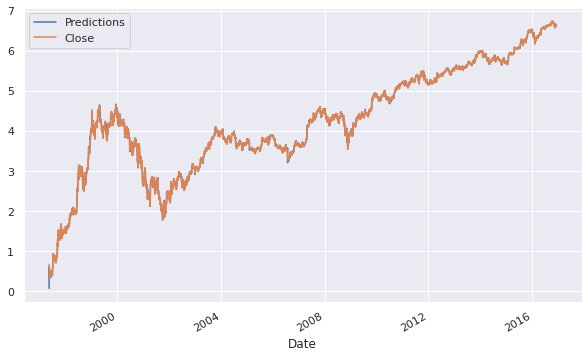

In [56]:
#Plot predicted and actual Opening values
train_data.plot(y=['Predictions','Close'])
train_data

In [165]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
fc = fitted1.forecast(len(test_data), alpha=0.05,exog=stock_data['Volume'][:int(len(df_close)*0.2)])
fc_series = pd.Series(fc, index=test_data.index)

rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))

RMSE: 0.9739560696471813


ARIMA

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-17934.294, Time=0.30 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-17932.635, Time=0.63 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-17932.658, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-17931.572, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-17932.501, Time=0.69 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 2.075 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4924
Model:               SARIMAX(0, 1, 0)   Log Likelihood                8969.147
Date:                Wed, 16 Nov 2022   AIC                         -17934.294
Time:                        08:22:01   BIC                         -17921.290
Sample:                             0   HQIC                        -17929.733
                               - 4924                             

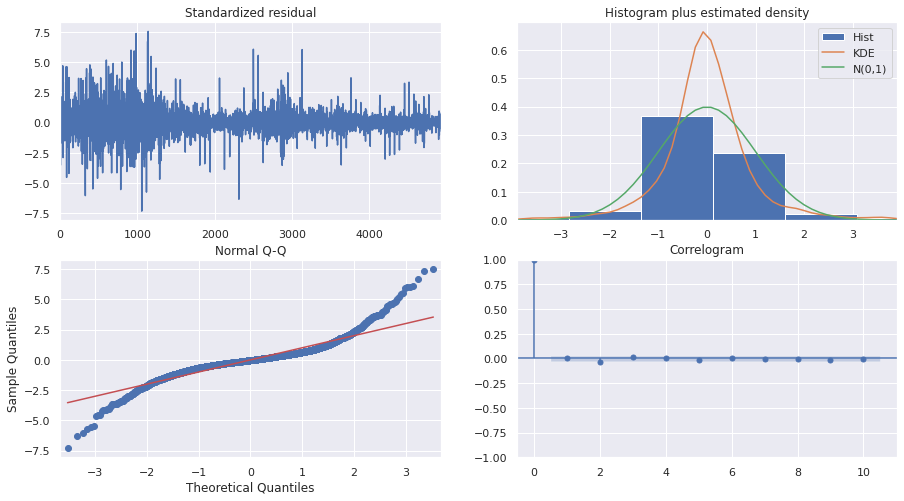

In [58]:
model_autoARIMA = auto_arima(train_data['Close'], start_p=0, start_q=0,
                      test='adf',       
                      max_p=3, max_q=3, 
                      m=1,              
                      d=None,           
                      seasonal=True,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True,)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [59]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data['Close'], order=(0, 1, 0))
fitted2 = model.fit()  
print(fitted2.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4924
Model:                 ARIMA(0, 1, 0)   Log Likelihood                8966.786
Date:                Wed, 16 Nov 2022   AIC                         -17931.572
Time:                        08:22:01   BIC                         -17925.070
Sample:                             0   HQIC                        -17929.292
                               - 4924                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0015   1.39e-05    110.147      0.000       0.002       0.002
Ljung-Box (L1) (Q):                   0.34   Jarque-Bera (JB):             12685.91
Prob(Q):                              0.56   Pr

<AxesSubplot:xlabel='Date'>

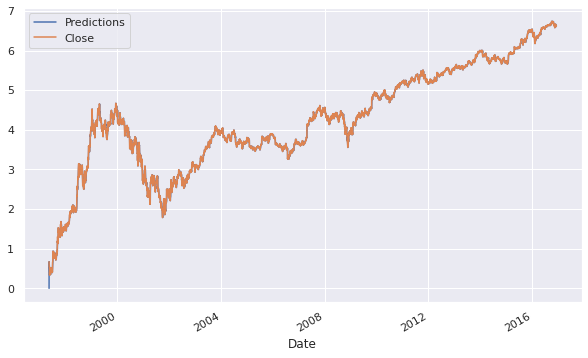

In [167]:
train_data['Predictions'] = list(fitted2.predict(0, len(train_data)-1))
train_data.plot(y=['Predictions','Close'])

In [168]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
fc = fitted2.forecast(len(test_data), alpha=0.05)

rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))

RMSE: 0.9820668852593264


LSTM UNIVARIATE

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn import preprocessing
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

In [63]:
df=pd.read_csv('../input/amazon-stock-price-all-time/Amazon.csv')

In [64]:
dtr=df.iloc[:, 1: 2].values

In [65]:
cut = int(len(df)*0.8)

x_train=df[:cut]['Close']
#y_train=train[:cut]['Close']
x_test = df[cut:]['Close']
#y_test=train[cut:]['Close']

In [66]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(x_train.values.reshape(-1,1))

In [67]:
x = []
y = []
for i in range(30, x_train.shape[0]):
    a=training_set_scaled[i-30:i, 0]
    x.append(a)
    y.append(training_set_scaled[i, 0]) 
x = np.array(x) 
y = np.array(y)
y=y.reshape(-1,1)

In [68]:
x=x.reshape(x.shape[0],x.shape[1],-1)
x.shape

(4894, 30, 1)

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn import preprocessing
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (x.shape[1], 1)))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

2022-11-16 08:22:08.248573: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [70]:
model.fit(x = x, y = y, batch_size = 32, epochs = 20)

2022-11-16 08:22:09.024265: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
153/153 [==============================] - 8s 35ms/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 2/20
153/153 [==============================] - 5s 34ms/step - loss: 2.4308e-04 - mean_squared_error: 2.4308e-04
Epoch 3/20
153/153 [==============================] - 5s 34ms/step - loss: 2.0672e-04 - mean_squared_error: 2.0672e-04
Epoch 4/20
153/153 [==============================] - 5s 34ms/step - loss: 2.0648e-04 - mean_squared_error: 2.0648e-04
Epoch 5/20
153/153 [==============================] - 6s 37ms/step - loss: 1.8007e-04 - mean_squared_error: 1.8007e-04
Epoch 6/20
153/153 [==============================] - 5s 35ms/step - loss: 1.8017e-04 - mean_squared_error: 1.8017e-04
Epoch 7/20
153/153 [==============================] - 5s 35ms/step - loss: 1.9695e-04 - mean_squared_error: 1.9695e-04
Epoch 8/20
153/153 [==============================] - 5s 34ms/step - loss: 1.6995e-04 - mean_squared_error: 1.6995e-04
Epoch 9/20
153/153 [==============================] - 5s

In [71]:
c=x_train.count()
new=x_train[c-30:].append(x_test,ignore_index=True)
dte=new.iloc[:].values
test_set_scaled = sc.transform(dte.reshape(-1,1))

In [72]:
predicted_list=[]
a1=new.count()
a2=x_test.count()
#print(a1,a2)
#print(test.count()['Open'])
k=0
inputs=[]
for i in range(a1-a2,a1): #500-40=460,500
    #print(i)
    a=test_set_scaled[i-30:i,0]
    inputs.append(a)

In [73]:
inputs=np.array(inputs)
inputs=inputs.reshape((inputs.shape[0],inputs.shape[1],1))
print(inputs.shape)
predicted_stock_price = model.predict(inputs)

(1231, 30, 1)


In [74]:
predictions = sc.inverse_transform(predicted_stock_price)

In [75]:
np.sqrt(np.mean(np.power((np.array(x_test)-np.array(predictions)[:,0]),2)))

405.4695208901257

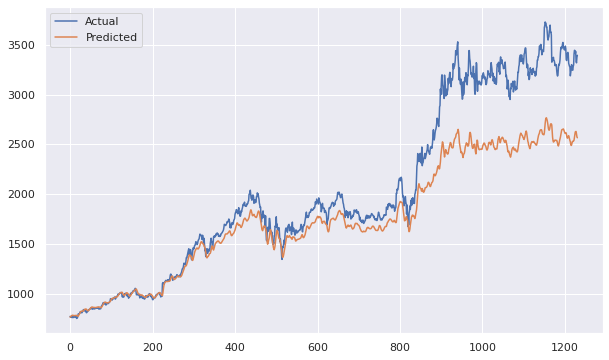

In [76]:
plt.plot(x_test.tolist(),label='Actual')
plt.plot(predictions,label='Predicted')
plt.legend()

LSTM MULTIVARIATE

In [97]:
df=pd.read_csv('../input/amazon-stock-price-all-time/Amazon.csv')

In [98]:
dtr=df.iloc[:, 1: 5].values

In [99]:
cut = int(len(df)*0.8)

x_train=df[:cut].drop(['Date','Volume'],axis=1)
#y_train=train[:cut]['Close']
x_test = df[cut:].drop(['Date','Volume'],axis=1)
#y_test=train[cut:]['Close']

In [100]:
x=df[:cut]
x.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [101]:
x1=df[cut:]
x1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
4924,2016-12-07,764.549988,770.419983,755.820007,770.419983,770.419983,3684900
4925,2016-12-08,771.869995,773.789978,765.190002,767.330017,767.330017,3189600
4926,2016-12-09,770.000000,770.250000,765.340027,768.659973,768.659973,2470900
4927,2016-12-12,766.400024,766.890015,757.200012,760.119995,760.119995,2963900
4928,2016-12-13,764.960022,782.460022,762.000000,774.340027,774.340027,5285300


In [102]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(x_train)

In [107]:
x = []
y = []
for i in range(30, x_train.shape[0]):
    list1=[]
    a=training_set_scaled[i-30:i, 1] #High
    b=training_set_scaled[i-30:i, 2] #Low
    c=training_set_scaled[i-30:i, 0] #Close 
    #list1.append(a1)
    list1.append(a)
    list1.append(b)
    list1.append(c)
    x.append(list1)
    y.append(training_set_scaled[i, 3]) #Open
x = np.array(x) 
y = np.array(y)
y=y.reshape(-1,1)

In [108]:
x.shape

(4894, 3, 30)

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn import preprocessing
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (x.shape[1], 30)))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 3, 50)             16200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 3, 50)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 36,451
Trainable params: 36,451
Non-trainable params: 0
_________________________________________________________________
None


In [141]:
model.fit(x = x, y = y, batch_size = 32, epochs = 20)

Epoch 1/20
153/153 [==============================] - 1s 8ms/step - loss: 1.1087e-04 - mean_squared_error: 1.1087e-04
Epoch 2/20
153/153 [==============================] - 1s 7ms/step - loss: 1.0254e-04 - mean_squared_error: 1.0254e-04
Epoch 3/20
153/153 [==============================] - 1s 7ms/step - loss: 1.1514e-04 - mean_squared_error: 1.1514e-04
Epoch 4/20
153/153 [==============================] - 1s 8ms/step - loss: 1.2476e-04 - mean_squared_error: 1.2476e-04
Epoch 5/20
153/153 [==============================] - 1s 7ms/step - loss: 1.0655e-04 - mean_squared_error: 1.0655e-04
Epoch 6/20
153/153 [==============================] - 1s 7ms/step - loss: 1.0452e-04 - mean_squared_error: 1.0452e-04
Epoch 7/20
153/153 [==============================] - 1s 7ms/step - loss: 9.7520e-05 - mean_squared_error: 9.7520e-05
Epoch 8/20
153/153 [==============================] - 1s 8ms/step - loss: 1.0227e-04 - mean_squared_error: 1.0227e-04
Epoch 9/20
153/153 [==============================] - 1s

In [142]:
c=x_train.count()['Close']
new=x_train[c-30:].append(x_test,ignore_index=True)
dte=new.iloc[:, 0: 5].values
test_set_scaled = sc.transform(dte)

In [143]:
predicted_list=[]
a1=new.count()['Close']
a2=x_test.count()['Close']
#print(a1,a2)
#print(test.count()['Open'])
k=0
inputs=[]
for i in range(a1-a2,a1): #500-40=460,500
    k+=1
    #j=i+a2
    list1=[]
    #print(i)
    #a1=test_set_scaled[i-30:i,0]
    a=test_set_scaled[i-30:i,1]
    #print(a)
    b=test_set_scaled[i-30:i,2]
    c=test_set_scaled[i-30:i,0]
    #list1.append(a1)
    list1.append(a)
    list1.append(b)
    list1.append(c)
    inputs.append(list1)

In [144]:
inputs=np.array(inputs)
predicted_stock_price = model.predict(inputs)

In [145]:
y_test=x_test['Close']

In [146]:
predicted_stock_price.shape

(1231, 1)

In [147]:
val=list()
for i in range(1231):
  n=[0]
  val.append(n)
p=np.append(predicted_stock_price,val,axis=1)
p=np.append(p,val,axis=1)
p=np.append(p,val,axis=1)
p=np.append(p,val,axis=1)

In [148]:
pred = sc.inverse_transform(p)

In [149]:
np.sqrt(np.mean(np.power((np.array(y_test)-np.array(pred)[:,0]),2)))  #RMSE

1272.4697783047036

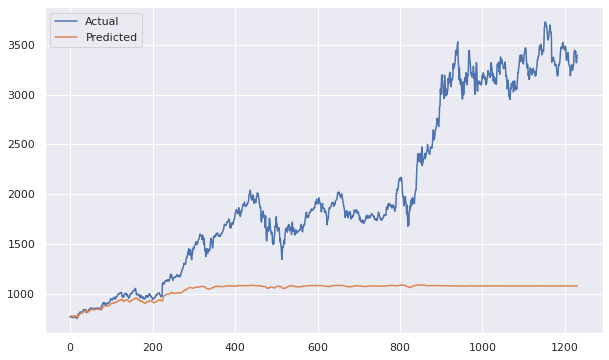

In [150]:
plt.plot(y_test.tolist(),label='Actual')
plt.plot(pred[:,0],label='Predicted')
plt.legend()